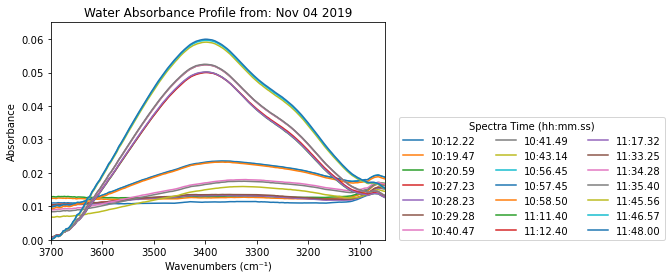

In [47]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

#spectra_file_location= Location of Input Files if file type is (.csv)
#spectra_filenames= Name of File in Input Files
spectra_file_location = os.path.abspath('Input_files\*.csv')
spectra_filenames= glob.glob(spectra_file_location)

#time= List of Times Extracted from Input File Name
time=[]

#Creates Directory if Directory does not exist
if not os.path.exists('FullSpectra/'):
    os.mkdir('FullSpectra/')

#for-loop for each file in Input Files to generate time and individual spectra plots   
for file in spectra_filenames:
    data_raw= pd.read_csv(file, sep=',', header=None) # Raw data in rows and columns via pandas
    base=os.path.basename(file)                       # Name of file in loop
    time_record= os.path.splitext(base)[0][12:20]     # Time which spectra was recorded of file in loop
    time_fix=time_record.replace('-',':',1)           # Time format change
    time_fix2=time_fix.replace('-','.',1)             # Time format change
    time.append(time_fix2)                            # Appending correct time to time list
    date_record= os.path.splitext(base)[0][5:11]      #Date of Experiment from Input File
    year_record= os.path.splitext(base)[0][20:25]     #Year of Experiment from Input File
    date_full=(date_record+year_record)               #Combination of Date and Year from Input File
    plt.plot(data_raw[0],data_raw[1])                 # Plotting column 0 of raw data on x-axis;column 1 on y-axis
    plt.xlim(max(data_raw[0]),min(data_raw[0]))       # Inversion of x-axis to match convention of wavenumber axis
    plt.title('Full Spectrum Plot from: '+ date_full) # Labeling plot title  
    plt.xlabel('Wavenumbers (cm⁻¹)')                  # Labeling plot x-axis
    plt.ylabel('Absorbance')                          # Labeling plot y-axis
    plt.savefig('FullSpectra/Phenothrin_WaterAbsorbance_Time_'+date_full+'_'+time_record+'.png') # Saves full spectrum of file currently in loop
    plt.close()                                       #Closes plot of file currently in loop

#for-loop for to generate an overlay plot in -OH absorbance band range for all files in Input Files   
for file in spectra_filenames:
    data_raw= pd.read_csv(file, sep=',', header=None) # Raw data in rows and columns via pandas
    plt.plot(data_raw[0],data_raw[1])                 # Plotting column 0 of raw data on x-axis;column 1 on y-axis
    plt.xlim(3700,3050)                               # Inversion and limiting x-axis to -OH absorbance region
    plt.ylim(min(data_raw[1]), 0.065)                 # Setting range of y-axis
plt.title('Water Absorbance Profile from: '+ date_full) #Labeling plot title
plt.xlabel('Wavenumbers (cm⁻¹)')                      #Labeling plot x-axis
plt.ylabel('Absorbance')                              #Labeling plot y-axis
plt.legend(time,ncol=3,loc=(1.04,0), title='Spectra Time (hh:mm.ss)')   #Labeling plot Legend 
plt.savefig('Phenothrin_WaterAbsorbance '+date_full+'.png', bbox_inches="tight", dpi=600) #Saving overlay spectra figure
plt.show()                                            #Displaying plot
plt.close()                                           #Closing plot
